<a href="https://www.kaggle.com/code/azminetoushikwasi/daily-aqi-air-quality-index-scheduled?scriptVersionId=103967216" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

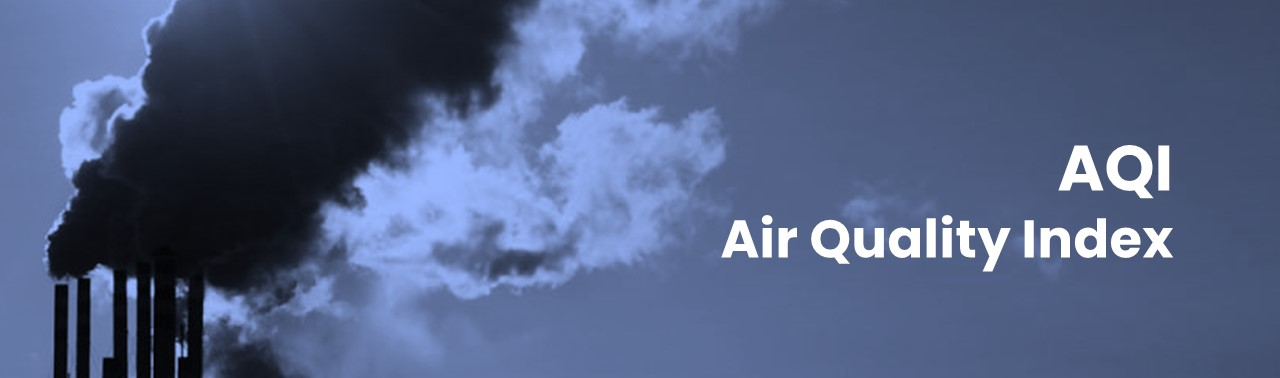

# 1. Introduction
## Air Quality Index
The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. The AQI focuses on health effects you may experience within a few hours or days after breathing polluted air.
Think of the AQI as a yardstick that runs from 0 to 500. The higher the AQI value, the greater the level of air pollution and the greater the health concern. For example, an AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.
For the pollutant. AQI values at and below 100 are generally considered to be satisfactory. When AQI values are above 100, air quality is considered to be unhealthy, at first for members of populations at greatest risk of a health effect, then for the entire population as AQI values get higher (greater than 150).

![](https://w.ndtvimg.com/sites/3/2019/12/18122812/air_pollution_standards_cpcb.png)

# 2. Modules and Data

## 2.1. Importing necessary modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

from bs4 import BeautifulSoup as BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen
import re
import time
import random
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer,all_palettes
import geopandas as gpd
import plotly.express as px

## 2.2. Configuration

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/country-names-with-short-codes-a2-a3-iso/country code.csv
/kaggle/input/renewable-energy-share-of-tfec/data.csv
/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_date.csv


## 2.3. Dataset

### [AQI - Air Quality Index [Scheduled - Daily Update]](https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update)

## 2.3.2 Web Scraping

In [4]:
aqi_name_list=['Albania', 'Algeria', 'Andorra', 'Angola', 'Argentina', 'Armenia', 'Australia',
               'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
               'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia',
               'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China',
               'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
               'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'French Guiana',
               'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe',
               'Guam', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
               'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan',
               'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Liechtenstein',
               'Lithuania', 'Luxembourg', 'Macao', 'Macedonia', 'Madagascar', 'Malaysia', 'Malta', 'Martinique',
               'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Myanmar', 'Nepal', 'Netherlands', 'New Caledonia',
               'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Palestinian Territory', 'Peru', 'Philippines', 'Poland',
               'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia', 'San Marino', 'Saudi Arabia', 'Senegal',
               'Serbia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sudan',
               'Sweden', 'Switzerland', 'Taiwan', 'Tajikistan', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Turkey', 'Turkmenistan',
               'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 
               'Uzbekistan', 'Vatican', 'Venezuela',
               'Vietnam', 'Zambia']
aqi_list =['/country/albania/', '/country/algeria/', '/country/andorra/', 
 '/country/angola/', '/country/argentina/', '/country/armenia/', '/country/australia/', 
 '/country/austria/', '/country/azerbaijan/', '/country/bahrain/', '/country/bangladesh/', 
 '/country/belarus/', '/country/belgium/', '/country/belize/', '/country/bermuda/', '/country/bolivia/', 
 '/country/bosnia-and-herzegovina/', '/country/brazil/', '/country/brunei/', '/country/bulgaria/', '/country/burkina-faso/',
 '/country/cambodia/', '/country/canada/', '/country/cape-verde/', '/country/cayman-islands/', '/country/central-african-republic/', 
 '/country/chad/', '/country/chile/', '/country/china/', '/country/colombia/', '/country/costa-rica/', '/country/croatia/', 
 '/country/cyprus/', '/country/czech-republic/', '/country/denmark/', '/country/dominican-republic/', '/country/ecuador/', 
 '/country/egypt/', '/country/el-salvador/', '/country/estonia/', '/country/ethiopia/', '/country/finland/', '/country/france/', 
 '/country/french-guiana/', '/country/gabon/', '/country/gambia/', '/country/georgia/', '/country/germany/', '/country/ghana/', 
 '/country/gibraltar/', '/country/greece/', '/country/grenada/', '/country/guadeloupe/', '/country/guam/', '/country/guatemala/', 
 '/country/honduras/', '/country/hong-kong/', '/country/hungary/', '/country/iceland/', '/country/india/', '/country/indonesia/',
 '/country/iran/', '/country/iraq/', '/country/ireland/', '/country/israel/', '/country/italy/', '/country/ivory-coast/', 
 '/country/japan/', '/country/jersey/', '/country/jordan/', '/country/kazakhstan/', '/country/kenya/', '/country/kosovo/',
 '/country/kuwait/', '/country/kyrgyzstan/', '/country/laos/', '/country/latvia/', '/country/lebanon/', '/country/liberia/',
 '/country/liechtenstein/', '/country/lithuania/', '/country/luxembourg/', '/country/macao/', '/country/macedonia/', 
 '/country/madagascar/', '/country/malaysia/', '/country/malta/', '/country/martinique/', '/country/mexico/', '/country/moldova/',
 '/country/monaco/', '/country/mongolia/', '/country/montenegro/', '/country/myanmar/', '/country/nepal/', '/country/netherlands/',
 '/country/new-caledonia/', '/country/new-zealand/', '/country/nigeria/', '/country/norway/', '/country/pakistan/', 
 '/country/palestinian-territory/', '/country/peru/', '/country/philippines/', '/country/poland/', '/country/portugal/', 
 '/country/puerto-rico/', '/country/qatar/', '/country/reunion/', '/country/romania/', '/country/russia/', '/country/san-marino/',
 '/country/saudi-arabia/', '/country/senegal/', '/country/serbia/', '/country/singapore/', '/country/slovakia/', '/country/slovenia/',
 '/country/south-africa/', '/country/south-korea/', '/country/spain/', '/country/sri-lanka/', '/country/sudan/', '/country/sweden/', 
 '/country/switzerland/', '/country/taiwan/', '/country/tajikistan/', '/country/thailand/', '/country/togo/', '/country/trinidad-and-tobago/', 
 '/country/turkey/', '/country/turkmenistan/', '/country/uganda/', '/country/ukraine/', '/country/united-arab-emirates/', '/country/united-kingdom/', 
 '/country/united-states/', '/country/uzbekistan/', '/country/vatican/', '/country/venezuela/', '/country/vietnam/', '/country/zambia/']

In [5]:
aqi_values=[]
aqi_statuses=[]

for i in range(len(aqi_list)):
    
    c_url= aqi_list[i]
    c_name=aqi_name_list[i]
    
    
    url='https://aqicn.org' + c_url
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    
    soup = BeautifulSoup(webpage, 'html.parser')
    
    products = soup.select('div.country-aqi-value')
    aqi_value=products[0].text
    aqi_values.append(aqi_value)
    
    products = soup.select('div.country-aqi-impact')
    aqi_status=products[0].text
    aqi_statuses.append(aqi_status)
    
    print(str((i+1)*100/len(aqi_list))+"% done")
    
    time.sleep(random.randint(0, 2))

0.704225352112676% done
1.408450704225352% done
2.112676056338028% done
2.816901408450704% done
3.5211267605633805% done
4.225352112676056% done
4.929577464788732% done
5.633802816901408% done
6.338028169014085% done
7.042253521126761% done
7.746478873239437% done
8.450704225352112% done
9.154929577464788% done
9.859154929577464% done
10.56338028169014% done
11.267605633802816% done
11.971830985915492% done
12.67605633802817% done
13.380281690140846% done
14.084507042253522% done
14.788732394366198% done
15.492957746478874% done
16.197183098591548% done
16.901408450704224% done
17.6056338028169% done
18.309859154929576% done
19.014084507042252% done
19.718309859154928% done
20.422535211267604% done
21.12676056338028% done
21.830985915492956% done
22.535211267605632% done
23.239436619718308% done
23.943661971830984% done
24.64788732394366% done
25.35211267605634% done
26.056338028169016% done
26.760563380281692% done
27.464788732394368% done
28.169014084507044% done
28.87323943661972% d

In [6]:
today_date=datetime.today().strftime('%Y-%m-%d')
today_data={
    "Country":aqi_name_list,
    "Status":aqi_statuses,
    "AQI Value":aqi_values
    }
today=pd.DataFrame(today_data)
today.Status=today.Status.str.replace('Unhealthyfor Sensitive Groups','Unhealthy for Sensitive Groups')
today.Status=today.Status.str.replace('VeryUnhealthy','Very Unhealthy')
today["AQI Value"]=today["AQI Value"].str.replace('-','0')

today = today.drop(today[today.Status == 'no data'].index)
today=today.reset_index()

today_list=[today_date for i in range(len(today ))]

data_date_today=pd.DataFrame({"Date":today_list,
                              "Country":today["Country"],
                              "Status":today.Status,
                              "AQI Value":today["AQI Value"]
                        })
# Date
try:
    data_date=pd.read_csv('/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_date.csv')
    data_date=data_date.append(data_date_today)
    data_date.to_csv('data_date.csv',index=False)
except:
    data_date=data_date_today.copy()
    data_date.to_csv('data_date.csv',index=False)

"""# Country
    
try:
    data_country=pd.read_csv('/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_country.csv')
    data_country["Status_"+str(today_date)]=today['Status']
    data_country["AQI Value_"+str(today_date)]=today['AQI Value']
    data_country.to_csv('data_country.csv',index=False)
except:
    data_country=pd.DataFrame({"Country":today["Country"]})
    data_country["Status_"+str(today_date)]=today['Status']
    data_country["AQI Value_"+str(today_date)]=today['AQI Value']
    data_country.to_csv('data_country.csv',index=False)"""

'# Country\n    \ntry:\n    data_country=pd.read_csv(\'/kaggle/input/aqi-air-quality-index-scheduled-daily-update/data_country.csv\')\n    data_country["Status_"+str(today_date)]=today[\'Status\']\n    data_country["AQI Value_"+str(today_date)]=today[\'AQI Value\']\n    data_country.to_csv(\'data_country.csv\',index=False)\nexcept:\n    data_country=pd.DataFrame({"Country":today["Country"]})\n    data_country["Status_"+str(today_date)]=today[\'Status\']\n    data_country["AQI Value_"+str(today_date)]=today[\'AQI Value\']\n    data_country.to_csv(\'data_country.csv\',index=False)'

**Let's plot today's data country-wise on a map and have a overall view of that.**

# 3. Plotting Today's Data on Map

I'm using **geopandas, with bokeh**; to plot **Country-wise AQL Values**.

In [7]:
gdf = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
cc=pd.read_csv("/kaggle/input/country-names-with-short-codes-a2-a3-iso/country code.csv",encoding = "ISO-8859-1")

data=today.copy()
cc['Country']=cc['Country'].str.lower()

cclist=[]

In [8]:
for i in range(len(today)):
    if data["Country"][i].lower() in list(cc['Country']):
        indx=list(cc['Country']).index(data["Country"][i].lower())
        data["Country"][i]=cc['Alpha-3 code'][indx]
        cclist.append((cc['Alpha-3 code'][indx],data['AQI Value'][i]))
        
data=pd.DataFrame(cclist,columns=['Country','AQI Values'])

In [9]:
merged = gdf.merge(data, left_on = 'iso_a3', right_on = 'Country', how='left')
merged['AQI Values'] = merged['AQI Values'].fillna(0)
merged_json = json.loads(merged.to_json())
json_data = json.dumps(merged_json)

high = int(today['AQI Value'].max())


def plot_map(json_data,plot_col,title):

    geosource = GeoJSONDataSource(geojson = json_data)

    #Define a sequential multi-hue color palette.
    palette = ['#f5dfec','#f5b8dc', '#eb8dc4', '#c71872' ,'#e01941', '#bd1133', '#7d0c23','#630d1f', '#45111c', '#45111c', '#241014']
    color_mapper = LinearColorMapper(palette = palette, low = 0, high = high+30)


    color_bar = ColorBar(color_mapper=color_mapper, label_standoff=16,width = 800, height = 10,
    border_line_color=None,location = (0,0), orientation = 'horizontal')

    p = figure(title = title, plot_height = 750 , plot_width = 1200, toolbar_location = None)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.patches('xs','ys', source = geosource,fill_color = {'field' :plot_col, 'transform' : color_mapper},
              line_color = 'black', line_width = 0.01, fill_alpha = 1)

    p.add_layout(color_bar, 'below')

    output_notebook()

    #Display figure.
    show(p)

In [10]:
plot_map(json_data,'AQI Values','Country-wise AQI Values : '+str(today_date))

Loading BokehJS ...

### Observations
- Asia seems to have the most polluted air.
- Europe seems to have morderately polluted air.
- Africa has a mixed condition, based on urbanization and indstrialization I guess.

# 4.  Basic Exploration

In [11]:
today.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      141 non-null    int64 
 1   Country    141 non-null    object
 2   Status     141 non-null    object
 3   AQI Value  141 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.5+ KB


### Observations
- 3 Columns, Country - Status - AQI Value

In [12]:
today.describe()

,index
count,141.000000
mean,70.205674
std,41.132281
min,0.000000
25%,35.000000
50%,70.000000
75%,105.000000
max,141.000000


### Observations
- 142 Countries Data
- Good os the most common status.
- 5 Different Statuses avilable.

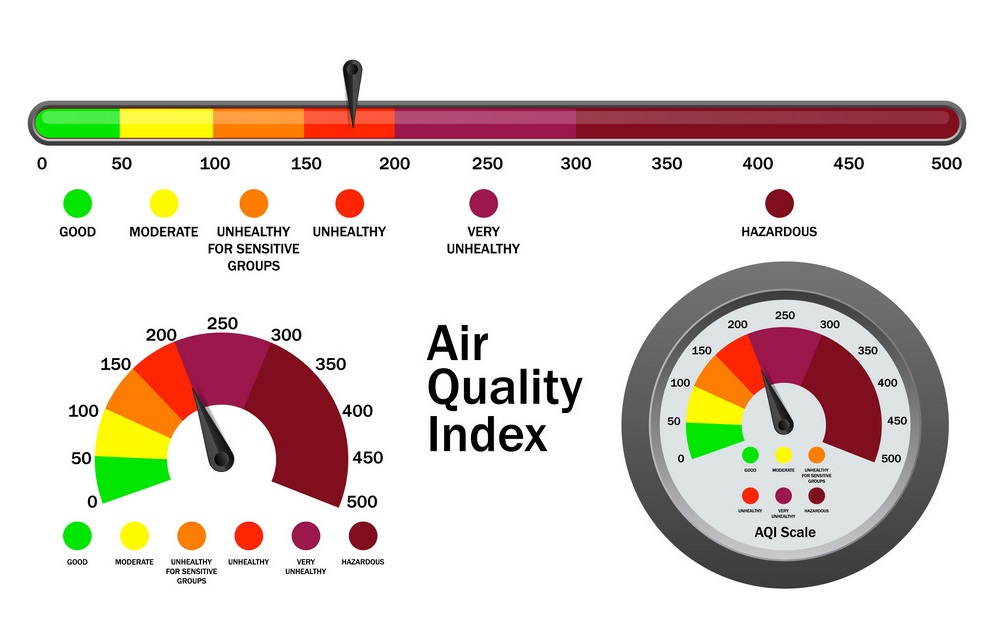

# 5. Overall Status by Countries

At First, let's us have a general overview of the data. Let's plot the count of Statuses - which is the most and which is the worst

Text(0.5, 1.0, 'Status-count by countries\n\n')

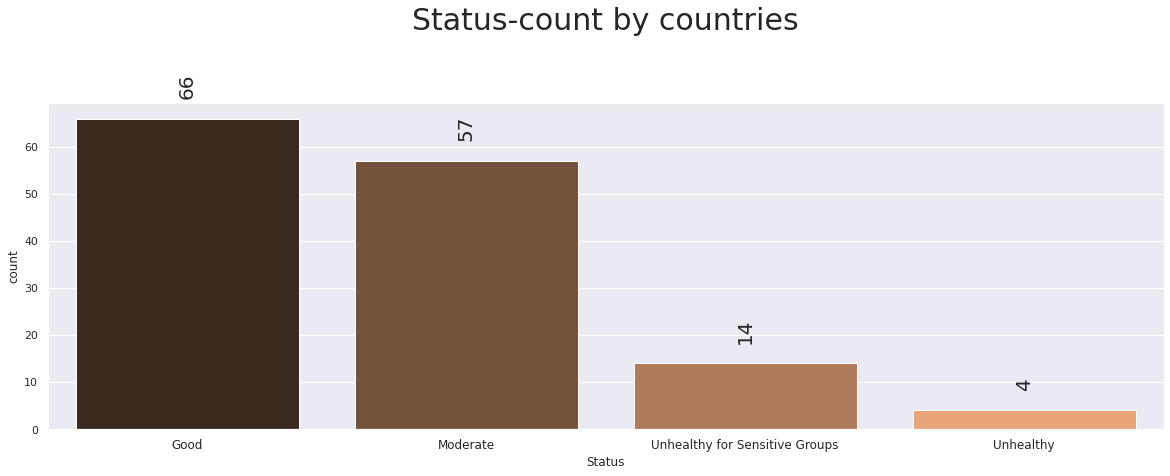

In [13]:
sns.set(rc={'figure.figsize':(20,6)})
plt.xticks(fontsize=12)
p=sns.countplot(today['Status'],order=today.Status.value_counts().sort_values(ascending=False).index,palette='copper')
p.bar_label(p.containers[len(p.containers)-1],label_type='edge',padding=20,fontsize=20,rotation='vertical')
p.axes.set_title("Status-count by countries\n\n",fontsize=30)

<AxesSubplot:xlabel='Status', ylabel='AQI Value'>

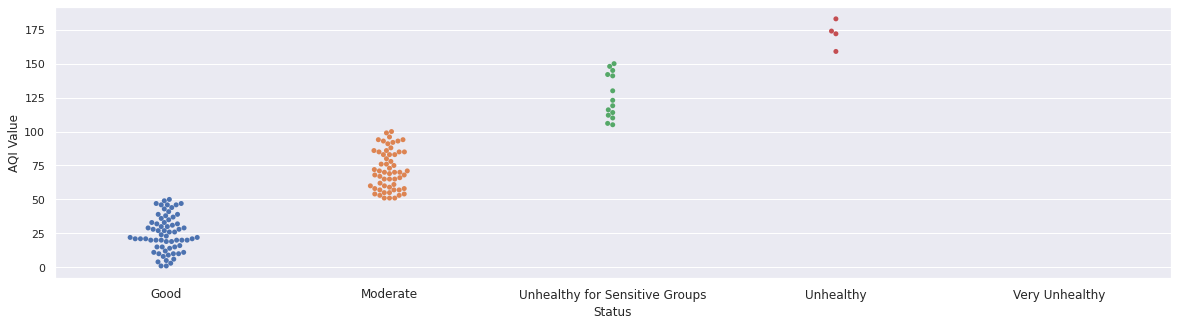

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
today['AQI Value']=pd.to_numeric(today['AQI Value'])
sns.swarmplot(data=today,x='Status',y='AQI Value',order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy'])

### Observations :
- Most of the Countries are in Good or Morderate state. Thats  a good sign.
- Some countries are in bottom line with unhealthy.

**Let's Explore the distribution**

# 5. Distribution

Text(0.5, 1.0, 'AQI Values Distribution')

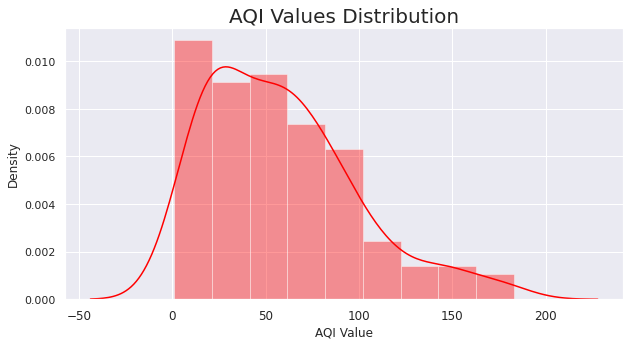

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(today['AQI Value'],color='Red')
p.axes.set_title("AQI Values Distribution",fontsize=20)

### Observations :

- The displot confirms that skewed distribution.

**Let's Explore good countries a bit more.**

# 6. Good and Morderate Countries

In [16]:
good=today[today['Status'].isin(['Good','Morderate'])]
print("Number of Good Countries:",len(good.Country))
print("Good Countries by AQL Values:",', '.join(good.Country))

Number of Good Countries: 66
Good Countries by AQL Values: Albania, Andorra, Austria, Azerbaijan, Belarus, Belize, Bosnia and Herzegovina, Brunei, Bulgaria, Cambodia, Cape Verde, Cayman Islands, Croatia, Cyprus, Czech Republic, Denmark, Dominican Republic, Estonia, Finland, France, French Guiana, Gabon, Gambia, Germany, Gibraltar, Grenada, Guadeloupe, Guam, Honduras, Hungary, Iceland, Ireland, Jersey, Jordan, Latvia, Liberia, Liechtenstein, Lithuania, Luxembourg, Macao, Macedonia, Malta, Martinique, Moldova, Monaco, Mongolia, Montenegro, Myanmar, New Caledonia, New Zealand, Norway, Palestinian Territory, Portugal, Puerto Rico, Reunion, San Marino, Senegal, Singapore, Slovakia, Slovenia, Sri Lanka, Sweden, Switzerland, Turkmenistan, Vatican, Venezuela


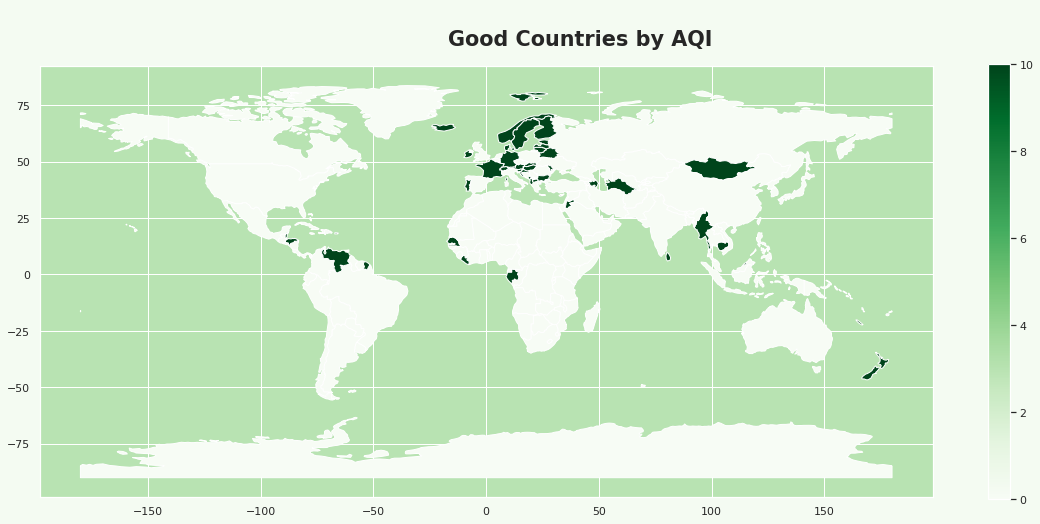

In [17]:
import geoplot
import mapclassify

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

values=[]

for i in list(world.name):
    if i in list(good.Country):
        values.append(10)
    else:
        values.append(0)

world['pop_est']=values
fig, ax = plt.subplots(figsize = (20,8), facecolor = plt.cm.Greens(.02))


fig.suptitle('\nGood Countries by AQI',
             fontsize = 'xx-large',  
             fontweight = 'bold')

ax.set_facecolor(plt.cm.Greens(.3))
world.plot(column = 'pop_est',
           cmap = 'Greens',
           ax = ax,
           legend = True)

plt.show()

### Observations :

- Most of them are located in **Europe and South-East Asia.**

**Let's Explore risky countries a bit more.**

# 7. Risky Countries

In [18]:
risky=today[today['Status'].isin(['Unhealthy for Sensitive Groups'])]
print("Number of Risky Countries:",len(risky.Country))
print("Risky Countries by AQL Values:",', '.join(risky.Country))

Number of Risky Countries: 14
Risky Countries by AQL Values: Angola, Bangladesh, Chile, China, Ethiopia, Guatemala, Iran, Kenya, Madagascar, Nigeria, Russia, Thailand, Uganda, United Arab Emirates


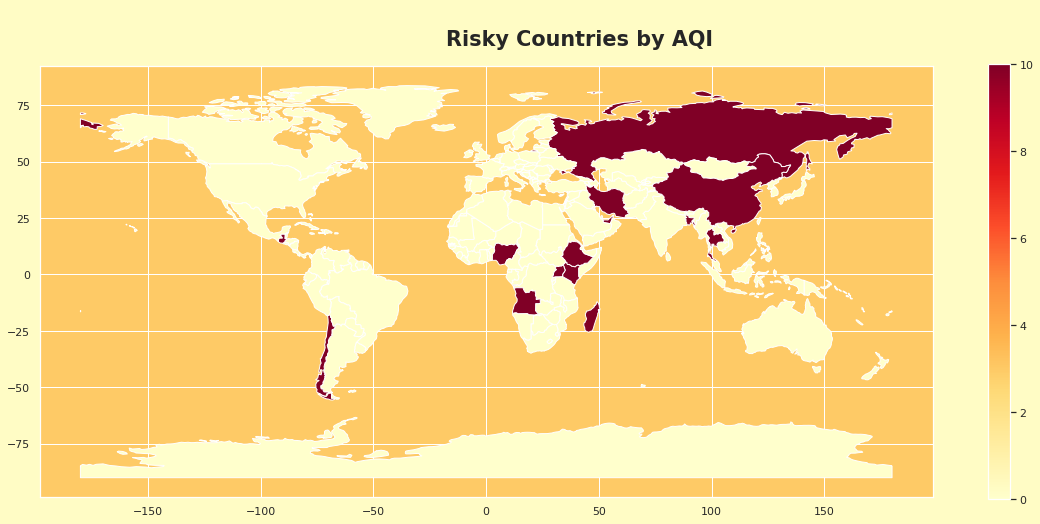

In [19]:
import geoplot
import mapclassify

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

values=[]

for i in list(world.name):
    if i in list(risky.Country):
        values.append(10)
    else:
        values.append(0)

world['pop_est']=values
fig, ax = plt.subplots(figsize = (20,8), facecolor = plt.cm.YlOrRd(.02))


fig.suptitle('\nRisky Countries by AQI',
             fontsize = 'xx-large',  
             fontweight = 'bold')

ax.set_facecolor(plt.cm.YlOrRd(.3))
world.plot(column = 'pop_est',
           cmap = 'YlOrRd',
           ax = ax,
           legend = True)

plt.show()

### Observations :

- Most of them are located in **Africa and North America, Asia**

**Let's Explore unhealthy countries a bit more.**

# 8. Unhealthy Countries

In [20]:
unhealthy=today[today['Status'].isin(['Unhealthy','Very Unhealthy'])]
print("Number of Unhealthy Countries:",len(unhealthy.Country))
print("Unhealthy Countries by AQL Values:",', '.join(unhealthy.Country))

Number of Unhealthy Countries: 4
Unhealthy Countries by AQL Values: Bahrain, India, Iraq, Qatar


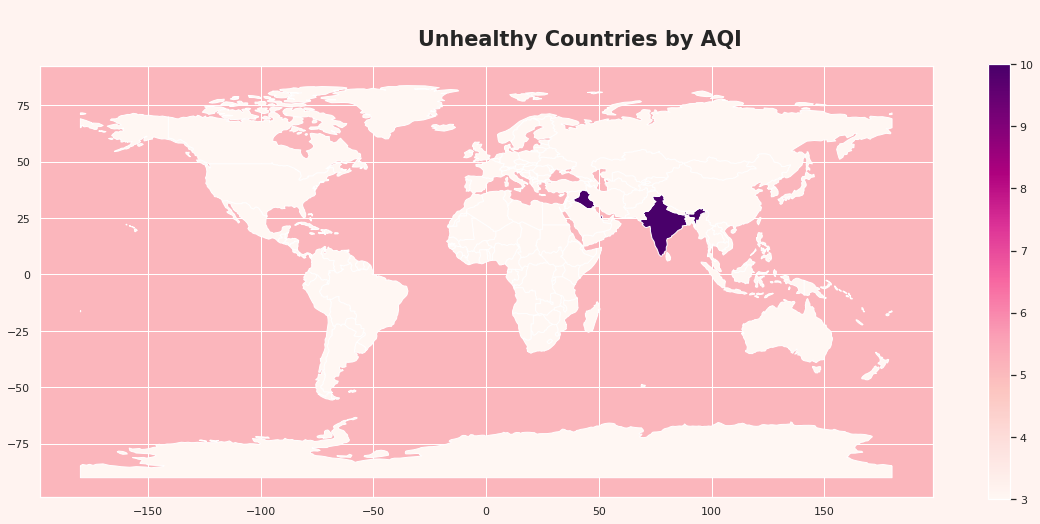

In [21]:
import geoplot
import mapclassify

world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

values=[]

for i in list(world.name):
    if i in list(unhealthy.Country):
        values.append(10)
    else:
        values.append(3)

world['pop_est']=values
fig, ax = plt.subplots(figsize = (20,8), facecolor = plt.cm.RdPu(.02))
fig.suptitle('\nUnhealthy Countries by AQI',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.RdPu(.3))
world.plot(column = 'pop_est',
           cmap = 'RdPu',
           ax = ax,
           legend = True)

plt.show()

### Observations :

- Most of them are located in **Africa, Middle East and South Asia**

# 9. Distributons of Each Groups

<AxesSubplot:xlabel='Status', ylabel='AQI Value'>

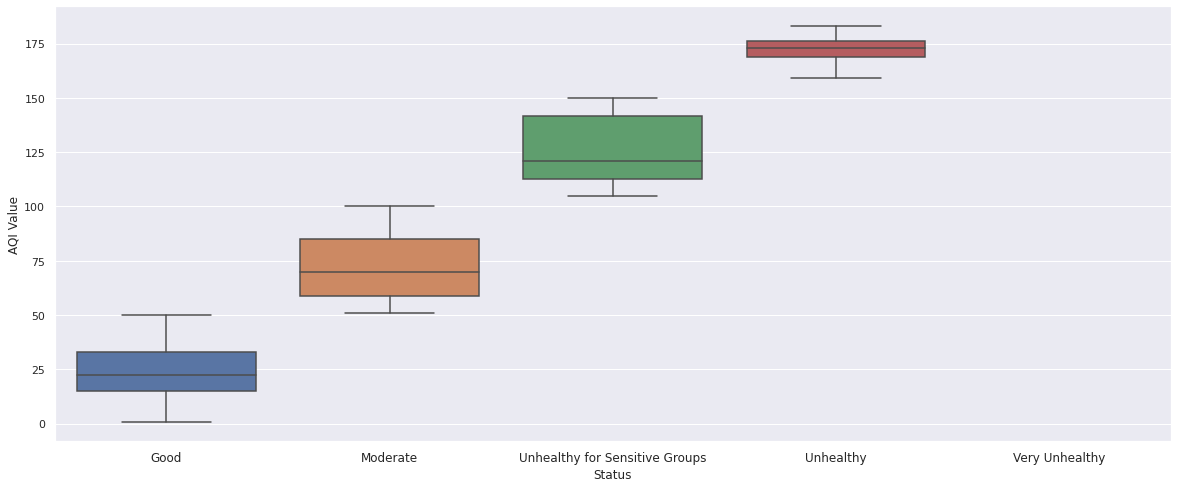

In [22]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)
today['AQI Value']=pd.to_numeric(today['AQI Value'])
sns.boxplot(data=today,x='Status',y='AQI Value',order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy'])

<AxesSubplot:xlabel='Status', ylabel='AQI Value'>

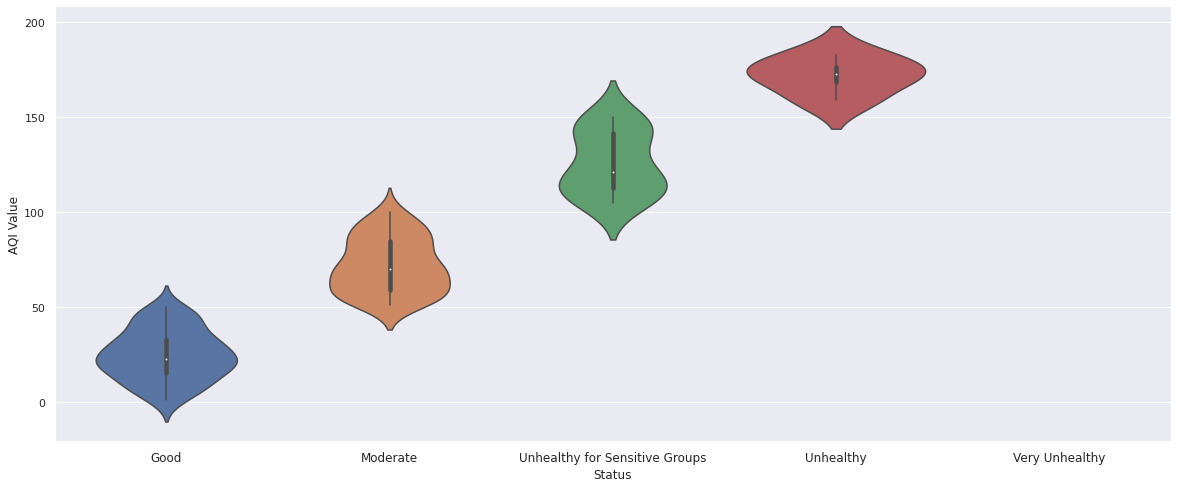

In [23]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)
today['AQI Value']=pd.to_numeric(today['AQI Value'])
sns.violinplot(data=today,x='Status',y='AQI Value',order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy'])

### Observations :

- Unhealthy - Status has a lower median, comparing to others.

# 10. Conclusion
- Asia seems to have the most polluted air.
- Europe seems to have morderately polluted air.
- Africa has a mixed condition, based on urbanization and indstrialization I guess.
- Most of the Countries are in Good or Morderate state. Thats  a good sign.
- Some countries are in bottom line with unhealthy.

# --------- Upvote, Comment, Share ---------  